### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> DATA LOADING AND PREPROCESSING

Importing the necessary libraries and laoding the data to have a preview of it. 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("data/T-20 World cup 2022.csv")
data.head()

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

### **Summary Statistics**

In [4]:
data.describe()

,comment_id,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,bowler1_id,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,9814.000000,9.814000e+03,9814.000000,9814.000000,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000,9.814000e+03,...,9814.000000,9814.000000,9.288000e+03,9288.000000,9288.000000,9288.000000,9288.000000,5.510000e+02,551.000000,551.000000
mean,85399.661708,1.298157e+06,1.477787,10.082841,3.486856,1.202262,5.377303e+05,15.691971,13.249440,6.226676e+05,...,14.978296,12.738537,6.216881e+05,2.172265,0.031654,14.684755,0.641042,5.691470e+05,15.029038,13.800363
std,78951.670137,1.355630e+01,0.499532,5.623045,1.707484,1.476730,3.181419e+05,16.454378,11.471307,3.276842e+05,...,16.376065,11.596212,3.287888e+05,1.039511,0.182317,9.366489,0.833070,3.305531e+05,16.466801,11.707343
min,110.000000,1.298135e+06,1.000000,1.000000,1.000000,0.000000,5.334000e+03,0.000000,0.000000,8.917000e+03,...,0.000000,0.000000,8.917000e+03,0.100000,0.000000,0.000000,0.000000,5.334000e+03,0.000000,1.000000
25%,18030.000000,1.298145e+06,1.000000,5.000000,2.000000,0.000000,3.089670e+05,4.000000,4.000000,3.481090e+05,...,2.000000,4.000000,3.481090e+05,1.000000,0.000000,7.000000,0.000000,3.233890e+05,3.000000,5.000000
50%,29010.000000,1.298157e+06,1.000000,10.000000,3.000000,1.000000,4.465070e+05,10.000000,10.000000,5.420230e+05,...,9.000000,9.000000,5.420230e+05,2.000000,0.000000,13.000000,0.000000,4.824780e+05,9.000000,10.000000
75%,118040.000000,1.298169e+06,2.000000,15.000000,5.000000,1.000000,7.843670e+05,23.000000,19.000000,9.229430e+05,...,23.000000,19.000000,9.229430e+05,3.000000,0.000000,20.000000,1.000000,8.337770e+05,21.000000,19.000000
max,219090.000000,1.298179e+06,2.000000,20.000000,6.000000,7.000000,1.278252e+06,109.000000,63.000000,1.278252e+06,...,107.000000,63.000000,1.278252e+06,4.000000,2.000000,59.000000,4.000000,1.278252e+06,109.000000,60.000000


In [5]:
data.bowler1_runs.value_counts()

bowler1_runs
1     548
4     515
5     464
0     461
6     455
2     440
10    424
9     424
7     414
8     374
3     362
11    356
13    356
14    353
12    346
15    338
16    303
17    263
19    244
18    239
20    236
21    227
22    215
23    189
24    153
25    149
26    119
27    106
28    103
29     88
30     84
31     79
32     68
33     60
34     39
35     30
36     28
39     25
37     25
38     21
40     17
43     15
41     15
42     12
46      5
45      4
44      4
53      3
48      3
50      2
49      2
57      2
47      1
54      1
56      1
52      1
55      1
59      1
58      1
Name: count, dtype: int64

The dataset has 9814 rows and 44 columns 

### **Dropping of Columns**

The columns below have more than three-quarter null values we therefore are going to drop them 

In [6]:
data = data.drop(columns = ["wicket_id", "wkt_batsman_name", "wkt_bowler_name", "wkt_batsman_runs", "wkt_batsman_balls", "wkt_text", "preText", "postText"])
data.shape

(9814, 36)

### **Duplicate Values**

In [7]:
print(f"There are {data.duplicated().sum()} duplicated values in the train set")

There are 1 duplicated values in the train set


In [8]:
dup = data[data.duplicated(keep = False) == True]
dup

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_name,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,isRetiredHurt,text
7796,26010,1298143,NED v SL,SL,NED,NED,2,7,1,4,...,0,0,784375.0,Lahiru Kumara,2.0,0.0,15.0,1.0,False,<b>Pulled to square leg first up!</b> This was...
7797,26010,1298143,NED v SL,SL,NED,NED,2,7,1,4,...,0,0,784375.0,Lahiru Kumara,2.0,0.0,15.0,1.0,False,<b>Pulled to square leg first up!</b> This was...


In [9]:
data = data.drop_duplicates()
print(f"There are {data.duplicated().sum()} duplicated values in the train set")

There are 0 duplicated values in the train set


### **Null Values**

In [10]:
data.isnull().sum()

comment_id           0
match_id             0
match_name           0
home_team            0
away_team            0
current_innings      0
innings_id           0
over                 0
ball                 0
runs                 0
shortText            0
isBoundary           0
isWide               0
isNoball             0
batsman1_id          0
batsman1_name        0
batsman1_runs        0
batsman1_balls       0
bowler1_id           0
bowler1_name         0
bowler1_overs        0
bowler1_maidens      0
bowler1_runs         0
bowler1_wkts         0
batsman2_id          0
batsman2_name        0
batsman2_runs        0
batsman2_balls       0
bowler2_id         526
bowler2_name       526
bowler2_overs      526
bowler2_maidens    526
bowler2_runs       526
bowler2_wkts       526
isRetiredHurt        0
text                28
dtype: int64

In [11]:
data = data.dropna()
data.isnull().sum()

comment_id         0
match_id           0
match_name         0
home_team          0
away_team          0
current_innings    0
innings_id         0
over               0
ball               0
runs               0
shortText          0
isBoundary         0
isWide             0
isNoball           0
batsman1_id        0
batsman1_name      0
batsman1_runs      0
batsman1_balls     0
bowler1_id         0
bowler1_name       0
bowler1_overs      0
bowler1_maidens    0
bowler1_runs       0
bowler1_wkts       0
batsman2_id        0
batsman2_name      0
batsman2_runs      0
batsman2_balls     0
bowler2_id         0
bowler2_name       0
bowler2_overs      0
bowler2_maidens    0
bowler2_runs       0
bowler2_wkts       0
isRetiredHurt      0
text               0
dtype: int64

### **Outliers**

In [12]:
# Create a function to check outliers
def check_outliers(data, columns):
 for column in columns:
    # Calculate IQR (Interquartile Range)
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    
    # Define lower and upper thresholds
    lower_threshold = data[column].quantile(0.25) - 1.5 * iqr
    upper_threshold = data[column].quantile(0.75) + 1.5 * iqr
    
    # Find outliers
    outliers = data[(data[column] < lower_threshold) | (data[column] > upper_threshold)]
    
    # Print the count of outliers
    print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data.select_dtypes(include = ["number"])
check_outliers(data, columns_to_check)

comment_id
Number of outliers: 0



match_id
Number of outliers: 0

innings_id
Number of outliers: 0

over
Number of outliers: 0

ball
Number of outliers: 0

runs
Number of outliers: 1304

batsman1_id
Number of outliers: 0

batsman1_runs
Number of outliers: 335

batsman1_balls
Number of outliers: 256

bowler1_id
Number of outliers: 0

bowler1_overs
Number of outliers: 0

bowler1_maidens
Number of outliers: 213

bowler1_runs
Number of outliers: 74

bowler1_wkts
Number of outliers: 236

batsman2_id
Number of outliers: 0

batsman2_runs
Number of outliers: 303

batsman2_balls
Number of outliers: 249

bowler2_id
Number of outliers: 0

bowler2_overs
Number of outliers: 0

bowler2_maidens
Number of outliers: 281

bowler2_runs
Number of outliers: 127

bowler2_wkts
Number of outliers: 330



In [13]:
data.shape

(9259, 36)

### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> EXPLORATORY DATA ANALYSIS

### **Countplot Summary**

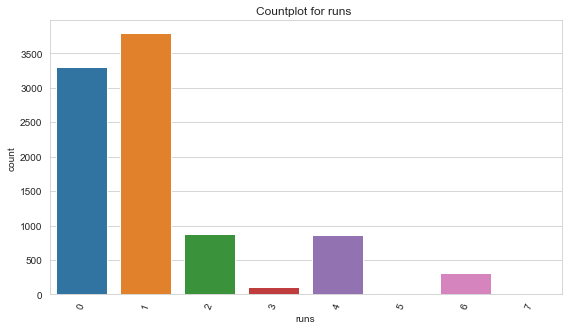

In [46]:
# Segragate numerical columns
num_cols = ["runs"]

plt.figure(figsize=(8, 13))
for i, cols in enumerate(num_cols):
    plt.subplot(3, 1, i+1)
    sns.countplot(data=data, x=cols)
    plt.xticks(rotation=70)
    plt.title(f'Countplot for {cols} ')
        

plt.tight_layout()
plt.show()


,batsman1_name,batsman1_runs,batsman1_balls
0,Aaron Finch,2156,2212
1,Aayan Afzal Khan,251,259
2,Adam Zampa,1,4
3,Afif Hossain,1051,844
4,Aiden Markram,1245,1133


### **Teamwise Analysis: Average Runs Scored (Home vs Away)**

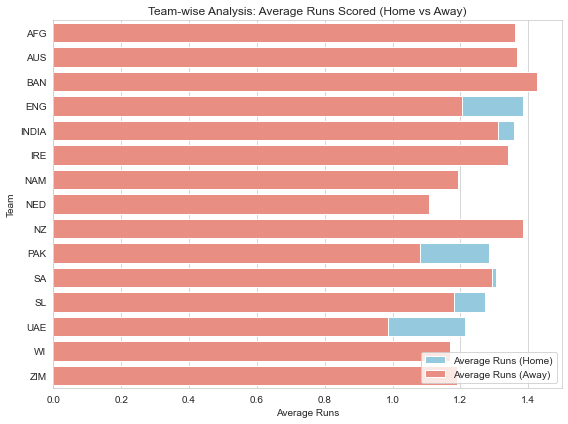

In [44]:
# Aggregate data by home team and calculate mean runs and wickets
home_team_performance = data.groupby('home_team')[['runs']].mean().reset_index()

# Aggregate data by away team and calculate mean runs and wickets
away_team_performance = data.groupby('away_team')[['runs']].mean().reset_index()

# Merge home and away team performance data
team_performance = pd.concat([home_team_performance, away_team_performance], ignore_index=True)

# Plot team-wise analysis
plt.figure(figsize=(8, 6))
sns.barplot(data=team_performance, x='runs', y='home_team', color='skyblue', label='Average Runs (Home)')
sns.barplot(data=team_performance, x='runs', y='away_team', color='salmon', label='Average Runs (Away)')
plt.xlabel('Average Runs')
plt.ylabel('Team')
plt.title('Team-wise Analysis: Average Runs Scored (Home vs Away)')
plt.legend()
plt.tight_layout()
plt.show()


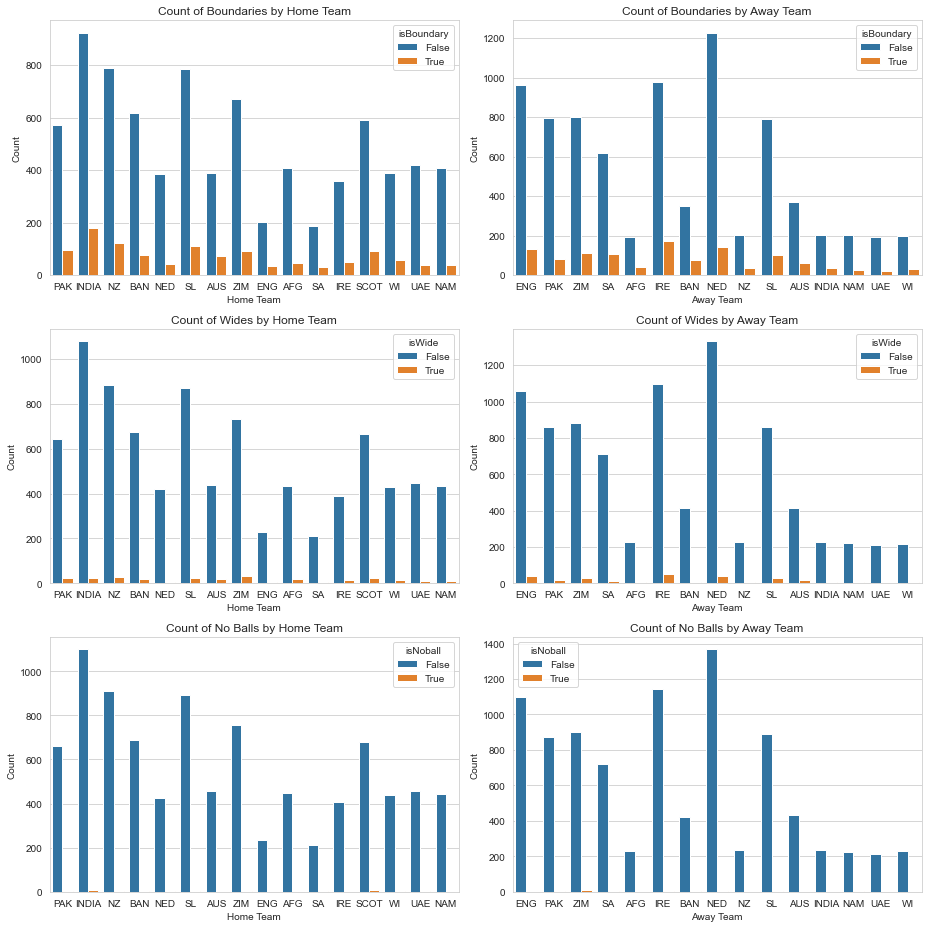

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Create subplots for each count plot
fig, axes = plt.subplots(3, 2, figsize=(13, 13))

# Plot for isBoundary
sns.countplot(data=data, x='home_team', hue='isBoundary', ax=axes[0, 0])
axes[0, 0].set_title('Count of Boundaries by Home Team')
axes[0, 0].set_xlabel('Home Team')
axes[0, 0].set_ylabel('Count')

sns.countplot(data=data, x='away_team', hue='isBoundary', ax=axes[0, 1])
axes[0, 1].set_title('Count of Boundaries by Away Team')
axes[0, 1].set_xlabel('Away Team')
axes[0, 1].set_ylabel('Count')

# Plot for isWide
sns.countplot(data=data, x='home_team', hue='isWide', ax=axes[1, 0])
axes[1, 0].set_title('Count of Wides by Home Team')
axes[1, 0].set_xlabel('Home Team')
axes[1, 0].set_ylabel('Count')

sns.countplot(data=data, x='away_team', hue='isWide', ax=axes[1, 1])
axes[1, 1].set_title('Count of Wides by Away Team')
axes[1, 1].set_xlabel('Away Team')
axes[1, 1].set_ylabel('Count')

# Plot for isNoball
sns.countplot(data=data, x='home_team', hue='isNoball', ax=axes[2, 0])
axes[2, 0].set_title('Count of No Balls by Home Team')
axes[2, 0].set_xlabel('Home Team')
axes[2, 0].set_ylabel('Count')

sns.countplot(data=data, x='away_team', hue='isNoball', ax=axes[2, 1])
axes[2, 1].set_title('Count of No Balls by Away Team')
axes[2, 1].set_xlabel('Away Team')
axes[2, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


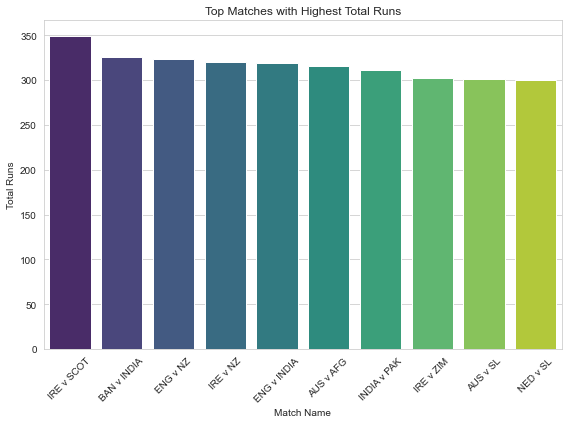

In [40]:
# Group the dataframe by match name and sum the runs for each match
match_total_runs = data.groupby('match_name')['runs'].sum()

# Sort the matches based on total runs in descending order
sorted_matches = match_total_runs.sort_values(ascending=False)

# Get the top N matches with the highest total runs
top_n_matches = sorted_matches.head(10)  # Change 10 to the desired number of top matches

# Plot the top matches with the highest total runs
plt.figure(figsize=(8, 6))
sns.barplot(x=top_n_matches.index, y=top_n_matches.values, palette='viridis')
plt.title('Top Matches with Highest Total Runs')
plt.xlabel('Match Name')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


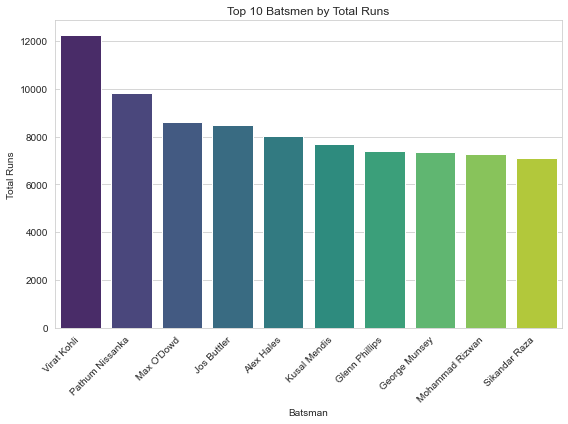

In [39]:
# Combine runs scored by both batsmen
total_runs_by_batsmen = data.groupby(['batsman1_name'])['batsman1_runs'].sum() + data.groupby(['batsman2_name'])['batsman2_runs'].sum()

# Convert the result to a DataFrame
bats_group_df = total_runs_by_batsmen.reset_index(name='total_runs').sort_values(by = "total_runs", ascending = False).head(10)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=bats_group_df, x='index', y='total_runs', palette='viridis')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



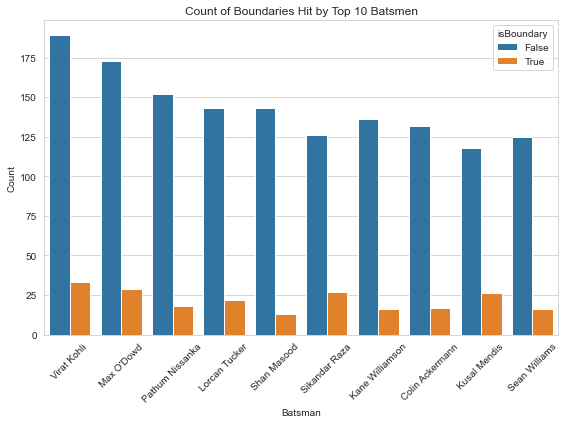

In [50]:
# Plot the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='batsman1_name', hue='isBoundary', order=data['batsman1_name'].value_counts().index[:10])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Batsman')
plt.ylabel('Count')
plt.title('Count of Boundaries Hit by Top 10 Batsmen')
plt.legend(title='isBoundary', loc='upper right')
plt.tight_layout()
plt.show()


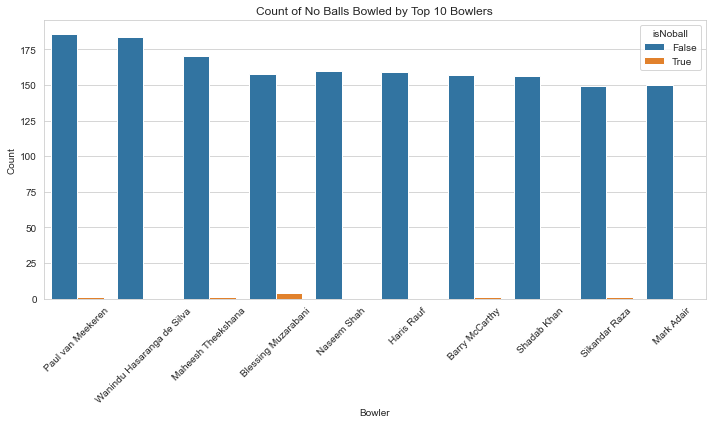

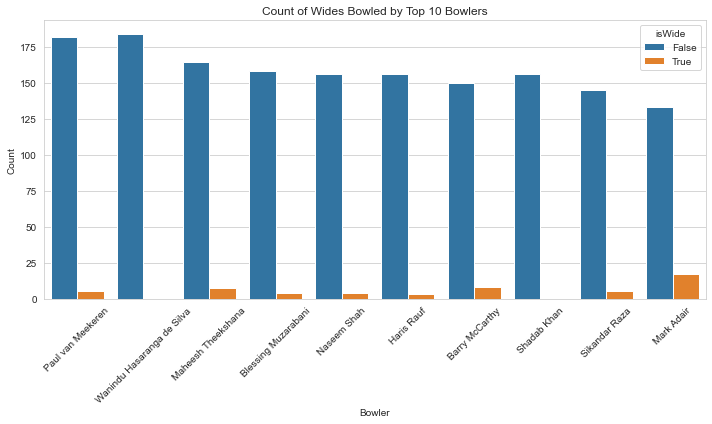

In [51]:
# Plot the count plot for isNoball
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='bowler1_name', hue='isNoball', order=data['bowler1_name'].value_counts().index[:10])
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.xlabel('Bowler')
plt.ylabel('Count')
plt.title('Count of No Balls Bowled by Top 10 Bowlers')
plt.legend(title='isNoball', loc='upper right')
plt.tight_layout()
plt.show()

# Plot the count plot for isWide
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='bowler1_name', hue='isWide', order=data['bowler1_name'].value_counts().index[:10])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Bowler')
plt.ylabel('Count')
plt.title('Count of Wides Bowled by Top 10 Bowlers')
plt.legend(title='isWide', loc='upper right')
plt.tight_layout()
plt.show()


### <div style="padding:2rem;font-size:100%;text-align:left;display:fill;border-radius:0.25rem;overflow:hidden;background-image: url(https://images.pexels.com/photos/2860804/pexels-photo-2860804.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> CONCLUSION